Training Bidirectional LSTM model...


C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step

Bidirectional LSTM Results:
Mean Squared Error (MSE): 840.8884017026026
Root Mean Squared Error (RMSE): 28.99807582758902
Mean Absolute Percentage Error (MAPE): 178.31688617771889
R-Squared (R²): 0.7905210799949939

Model Comparison:
                            MSE       RMSE        MAPE  R2 Score
Bidirectional LSTM  840.888402  28.998076  178.316886  0.790521


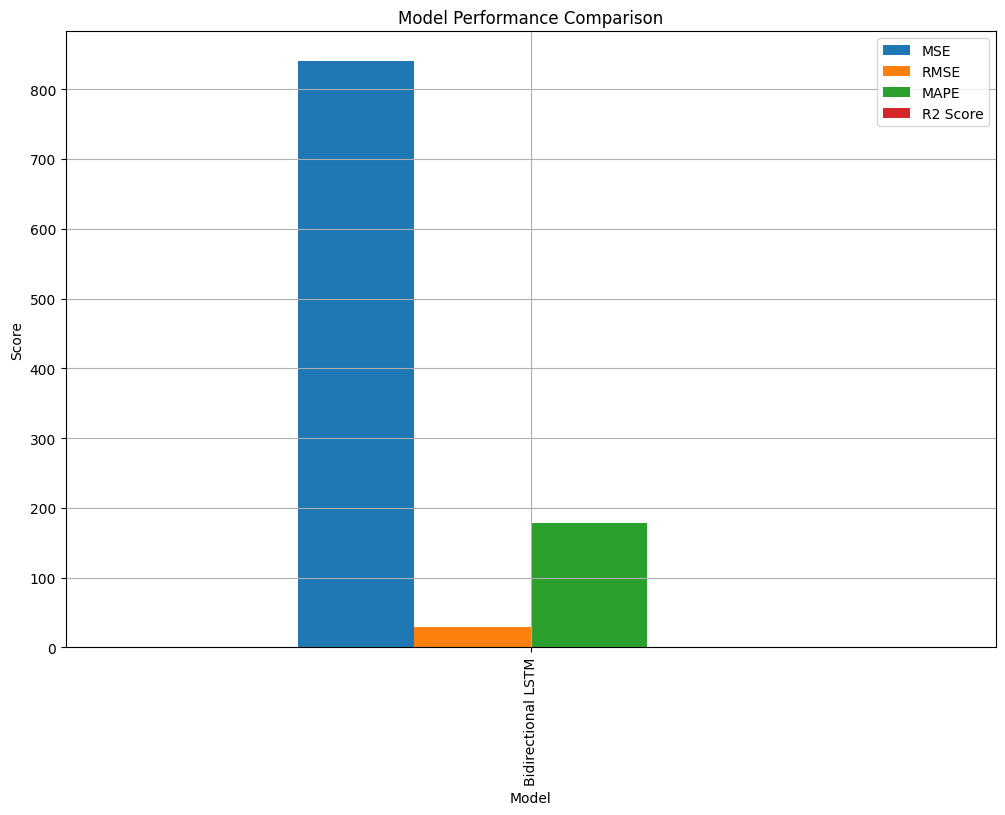

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('new_data2.csv')

# Drop the date column and set X, y
data = data.drop(columns=['date(dd/mm/yy)'])

# Creating lag features (shifted versions of the target 'HYB')
def create_lag_features(data, column, n_lags=3):
    for lag in range(1, n_lags + 1):
        data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return data

# Adding lag features for 'HYB' (target column)
data_lagged = create_lag_features(data, 'HYB', n_lags=3)
data_lagged = data_lagged.dropna()  # Drop NaN values created by lagging

# Set X and y again after creating lag features
X = data_lagged.drop(columns=['HYB']).values
y = data_lagged['HYB'].values

# Scaling with MinMaxScaler
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape X for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Custom MAPE function to handle zeros in y_true
def custom_mape(y_true, y_pred):
    mask = y_true != 0  # Mask to filter out zero values in y_true
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Initialize a dictionary to store results
results = {}

# Model: Bidirectional LSTM
print("Training Bidirectional LSTM model...")
model_bidir = Sequential()
model_bidir.add(Bidirectional(LSTM(200, return_sequences=True, activation='tanh'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_bidir.add(Dropout(0.3))
model_bidir.add(Bidirectional(LSTM(100, activation='tanh')))
model_bidir.add(Dropout(0.3))
model_bidir.add(Dense(1))  # Output layer for regression

# Compile the model
optimizer_bidir = Adam(learning_rate=0.0005)
model_bidir.compile(optimizer=optimizer_bidir, loss='mean_squared_error')

# Fit the model
history_bidir = model_bidir.fit(X_train_reshaped, y_train, epochs=300, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=0)

# Predictions on the test set
predictions_scaled_bidir = model_bidir.predict(X_test_reshaped)
predictions_bidir = scaler_y.inverse_transform(predictions_scaled_bidir)  # Inverse transform predictions
y_test_rescaled_bidir = scaler_y.inverse_transform(y_test)  # Inverse transform y_test

# Calculating Metrics on test set
mse_bidir = mean_squared_error(y_test_rescaled_bidir, predictions_bidir)
rmse_bidir = np.sqrt(mse_bidir)
mape_bidir = custom_mape(y_test_rescaled_bidir, predictions_bidir)
r2_bidir = r2_score(y_test_rescaled_bidir, predictions_bidir)

# Store Bidirectional LSTM results
results['Bidirectional LSTM'] = {
    "MSE": mse_bidir,
    "RMSE": rmse_bidir,
    "MAPE": mape_bidir,
    "R2 Score": r2_bidir
}

print("\nBidirectional LSTM Results:")
print(f'Mean Squared Error (MSE): {mse_bidir}')
print(f'Root Mean Squared Error (RMSE): {rmse_bidir}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_bidir}')
print(f'R-Squared (R²): {r2_bidir}\n')

# Compare Results
results_df = pd.DataFrame(results).T
print("Model Comparison:\n", results_df)

# Plot Comparison
results_df[['MSE', 'RMSE', 'MAPE', 'R2 Score']].plot(kind='bar', figsize=(12, 8), title="Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.grid(True)
plt.show()


Training 1D CNN model...


C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001F2F25CD9E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

1D CNN Results:
Mean Squared Error (MSE): 1654.7663124941103
Root Mean Squared Error (RMSE): 40.67881896631354
Mean Absolute Percentage Error (MAPE): 167.01955362527167
R-Squared (R²): 0.58777091074

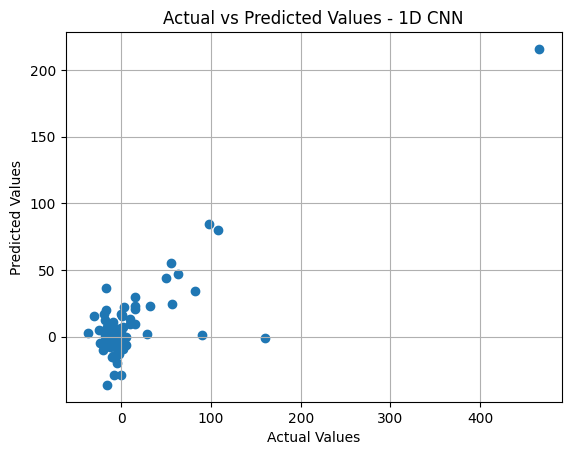

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('new_data2.csv')

# Drop the date column and set X, y
data = data.drop(columns=['date(dd/mm/yy)'])

# Creating lag features (shifted versions of the target 'HYB')
def create_lag_features(data, column, n_lags=3):
    for lag in range(1, n_lags + 1):
        data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return data

# Adding lag features for 'HYB' (target column)
data_lagged = create_lag_features(data, 'HYB', n_lags=3)
data_lagged = data_lagged.dropna()  # Drop NaN values created by lagging

# Set X and y again after creating lag features
X = data_lagged.drop(columns=['HYB']).values
y = data_lagged['HYB'].values

# Scaling with MinMaxScaler
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape X for 1D CNN (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Custom MAPE function to handle zeros in y_true
def custom_mape(y_true, y_pred):
    mask = y_true != 0  # Mask to filter out zero values in y_true
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Model: 1D Convolutional Neural Network (CNN)
print("Training 1D CNN model...")
model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Flatten())
model_cnn.add(Dense(1))  # Output layer for regression

# Compile the model
optimizer_cnn = Adam(learning_rate=0.0005)
model_cnn.compile(optimizer=optimizer_cnn, loss='mean_squared_error')

# Fit the model
history_cnn = model_cnn.fit(X_train_reshaped, y_train, epochs=300, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=0)

# Predictions on the test set
predictions_scaled_cnn = model_cnn.predict(X_test_reshaped)
predictions_cnn = scaler_y.inverse_transform(predictions_scaled_cnn)  # Inverse transform predictions
y_test_rescaled_cnn = scaler_y.inverse_transform(y_test)  # Inverse transform y_test

# Calculating Metrics on test set
mse_cnn = mean_squared_error(y_test_rescaled_cnn, predictions_cnn)
rmse_cnn = np.sqrt(mse_cnn)
mape_cnn = custom_mape(y_test_rescaled_cnn, predictions_cnn)
r2_cnn = r2_score(y_test_rescaled_cnn, predictions_cnn)

print("\n1D CNN Results:")
print(f'Mean Squared Error (MSE): {mse_cnn}')
print(f'Root Mean Squared Error (RMSE): {rmse_cnn}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_cnn}')
print(f'R-Squared (R²): {r2_cnn}\n')

# Plot Actual vs Predicted
plt.scatter(y_test_rescaled_cnn, predictions_cnn)
plt.title('Actual vs Predicted Values - 1D CNN')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


Training CNN-LSTM hybrid model...


C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

CNN-LSTM Hybrid Model Results:
Mean Squared Error (MSE): 1110.3290926933614
Root Mean Squared Error (RMSE): 33.321600992349715
Mean Absolute Percentage Error (MAPE): 137.9482744957123
R-Squared (R²): 0.13951125746564175



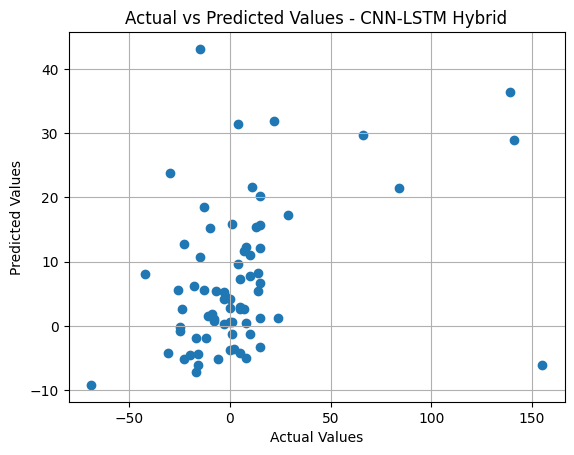

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('new_data2.csv')

# Drop the date column and set X, y
data = data.drop(columns=['date(dd/mm/yy)'])

# Creating lag features (shifted versions of the target 'HYB')
def create_lag_features(data, column, n_lags=5):  # Increased lag features
    for lag in range(1, n_lags + 1):
        data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return data

# Adding lag features for 'HYB' (target column)
data_lagged = create_lag_features(data, 'HYB', n_lags=5)
data_lagged = data_lagged.dropna()  # Drop NaN values created by lagging

# Set X and y again after creating lag features
X = data_lagged.drop(columns=['HYB']).values
y = data_lagged['HYB'].values

# Scaling with MinMaxScaler
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape X for CNN-LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Custom MAPE function to handle zeros in y_true
def custom_mape(y_true, y_pred):
    mask = y_true != 0  # Mask to filter out zero values in y_true
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Model: CNN-LSTM Hybrid Model
print("Training CNN-LSTM hybrid model...")
model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model_cnn_lstm.add(Dropout(0.3))
model_cnn_lstm.add(Conv1D(32, kernel_size=3, activation='relu'))
model_cnn_lstm.add(Dropout(0.3))
model_cnn_lstm.add(LSTM(100, activation='tanh'))
model_cnn_lstm.add(Dropout(0.3))
model_cnn_lstm.add(Dense(1))  # Output layer for regression

# Compile the model
optimizer_cnn_lstm = Adam(learning_rate=0.0005)
model_cnn_lstm.compile(optimizer=optimizer_cnn_lstm, loss='mean_squared_error')

# Fit the model
history_cnn_lstm = model_cnn_lstm.fit(X_train_reshaped, y_train, epochs=300, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=0)

# Predictions on the test set
predictions_scaled_cnn_lstm = model_cnn_lstm.predict(X_test_reshaped)
predictions_cnn_lstm = scaler_y.inverse_transform(predictions_scaled_cnn_lstm)  # Inverse transform predictions
y_test_rescaled_cnn_lstm = scaler_y.inverse_transform(y_test)  # Inverse transform y_test

# Calculating Metrics on test set
mse_cnn_lstm = mean_squared_error(y_test_rescaled_cnn_lstm, predictions_cnn_lstm)
rmse_cnn_lstm = np.sqrt(mse_cnn_lstm)
mape_cnn_lstm = custom_mape(y_test_rescaled_cnn_lstm, predictions_cnn_lstm)
r2_cnn_lstm = r2_score(y_test_rescaled_cnn_lstm, predictions_cnn_lstm)

print("\nCNN-LSTM Hybrid Model Results:")
print(f'Mean Squared Error (MSE): {mse_cnn_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_cnn_lstm}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_cnn_lstm}')
print(f'R-Squared (R²): {r2_cnn_lstm}\n')

# Plot Actual vs Predicted
plt.scatter(y_test_rescaled_cnn_lstm, predictions_cnn_lstm)
plt.title('Actual vs Predicted Values - CNN-LSTM Hybrid')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('new_data2.csv')

# Drop the date column and set X, y
data = data.drop(columns=['date(dd/mm/yy)'])

# Creating lag features (shifted versions of the target 'HYB')
def create_lag_features(data, column, n_lags=3):
    for lag in range(1, n_lags + 1):
        data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return data

# Adding lag features for 'HYB' (target column)
data_lagged = create_lag_features(data, 'HYB', n_lags=3)
data_lagged = data_lagged.dropna()  # Drop NaN values created by lagging

# Set X and y again after creating lag features
X = data_lagged.drop(columns=['HYB']).values
y = data_lagged['HYB'].values

# Scaling with MinMaxScaler
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape X for LSTM (samples, timesteps, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Custom MAPE function to handle zeros in y_true
def custom_mape(y_true, y_pred):
    mask = y_true != 0  # Mask to filter out zero values in y_true
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Initialize a dictionary to store results
results = {}

# Model: Bidirectional LSTM
print("Training Bidirectional LSTM model...")
model_bidir = Sequential()
model_bidir.add(Bidirectional(LSTM(200, return_sequences=True, activation='tanh'), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_bidir.add(Dropout(0.3))
model_bidir.add(Bidirectional(LSTM(100, activation='tanh')))
model_bidir.add(Dropout(0.3))
model_bidir.add(Dense(1))  # Output layer for regression

# Compile the model
optimizer_bidir = Adam(learning_rate=0.0005)
model_bidir.compile(optimizer=optimizer_bidir, loss='mean_squared_error')

# Fit the model
history_bidir = model_bidir.fit(X_train_reshaped, y_train, epochs=300, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=0)

# Predictions on the test set
predictions_scaled_bidir = model_bidir.predict(X_test_reshaped)
predictions_bidir = scaler_y.inverse_transform(predictions_scaled_bidir)  # Inverse transform predictions
y_test_rescaled_bidir = scaler_y.inverse_transform(y_test)  # Inverse transform y_test

# Calculating Metrics on test set
mse_bidir = mean_squared_error(y_test_rescaled_bidir, predictions_bidir)
rmse_bidir = np.sqrt(mse_bidir)
mape_bidir = custom_mape(y_test_rescaled_bidir, predictions_bidir)
r2_bidir = r2_score(y_test_rescaled_bidir, predictions_bidir)

# Store Bidirectional LSTM results
results['Bidirectional LSTM'] = {
    "MSE": mse_bidir,
    "RMSE": rmse_bidir,
    "MAPE": mape_bidir,
    "R2 Score": r2_bidir
}

# Model: LSTM
print("Training LSTM model...")
model_lstm = Sequential()
model_lstm.add(LSTM(200, return_sequences=True, activation='tanh', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(100, activation='tanh'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1))  # Output layer for regression

# Compile the model
optimizer_lstm = Adam(learning_rate=0.0005)
model_lstm.compile(optimizer=optimizer_lstm, loss='mean_squared_error')

# Fit the model
history_lstm = model_lstm.fit(X_train_reshaped, y_train, epochs=300, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=0)

# Predictions on the test set
predictions_scaled_lstm = model_lstm.predict(X_test_reshaped)
predictions_lstm = scaler_y.inverse_transform(predictions_scaled_lstm)  # Inverse transform predictions
y_test_rescaled_lstm = scaler_y.inverse_transform(y_test)  # Inverse transform y_test

# Calculating Metrics on test set
mse_lstm = mean_squared_error(y_test_rescaled_lstm, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mape_lstm = custom_mape(y_test_rescaled_lstm, predictions_lstm)
r2_lstm = r2_score(y_test_rescaled_lstm, predictions_lstm)

# Store LSTM results
results['LSTM'] = {
    "MSE": mse_lstm,
    "RMSE": rmse_lstm,
    "MAPE": mape_lstm,
    "R2 Score": r2_lstm
}

# Displaying Results
print("\nBidirectional LSTM Results:")
print(f'Mean Squared Error (MSE): {mse_bidir}')
print(f'Root Mean Squared Error (RMSE): {rmse_bidir}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_bidir}')
print(f'R-Squared (R²): {r2_bidir}\n')

print("\nLSTM Results:")
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_lstm}')
print(f'R-Squared (R²): {r2_lstm}\n')

# Compare Results
results_df = pd.DataFrame(results).T
print("Model Comparison:\n", results_df)

# Plot Comparison
# results_df[['MSE', 'RMSE', 'MAPE', 'R2 Score']].plot(kind='bar', figsize=(12, 8), title="Model Performance Comparison")
# plt.xlabel("Model")
# plt.ylabel("Score")
# plt.grid(True)
# plt.show()


Training Bidirectional LSTM model...


C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 992ms/step
Training LSTM model...


C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step

Bidirectional LSTM Results:
Mean Squared Error (MSE): 874.6256650242477
Root Mean Squared Error (RMSE): 29.5740708226691
Mean Absolute Percentage Error (MAPE): 201.10726580476774
R-Squared (R²): 0.7821165812883484


LSTM Results:
Mean Squared Error (MSE): 810.5708565803155
Root Mean Squared Error (RMSE): 28.470526102977367
Mean Absolute Percentage Error (MAPE): 158.00072222461904
R-Squared (R²): 0.7980736715119665

Model Comparison:
                            MSE       RMSE        MAPE  R2 Score
Bidirectional LSTM  874.625665  29.574071  201.107266  0.782117
LSTM                810.570857  28.470526  158.000722  0.798074


23:43:29 - cmdstanpy - INFO - Chain [1] start processing
23:43:29 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model with Log Transformation and Tuning Results:
Mean Squared Error (MSE): 1608.8406913928882
Root Mean Squared Error (RMSE): 40.11035641069384
Mean Absolute Percentage Error (MAPE): 1657.6791666968968
R-Squared (R²): -0.09809122655002778


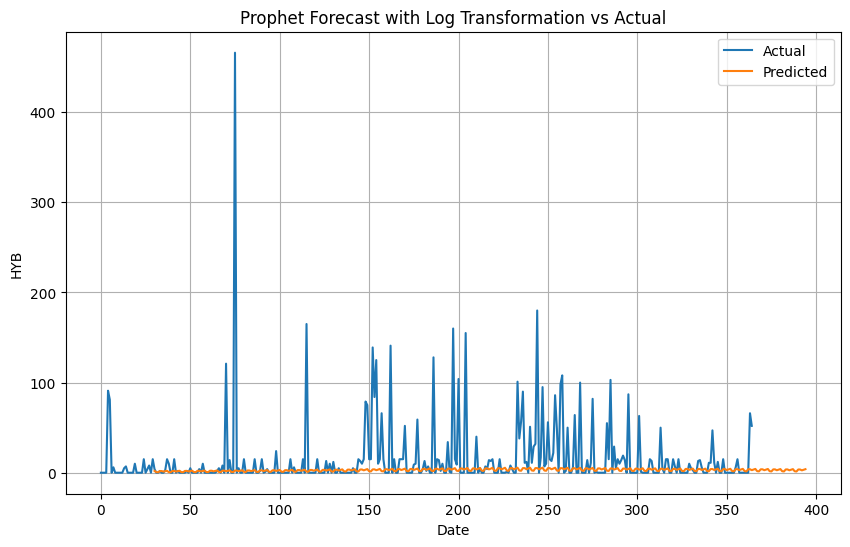

In [1]:
import numpy as np
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset and add a 'ds' column for Prophet
data = pd.read_csv('new_data2.csv')
prophet_data = data[['HYB']].copy()
prophet_data['ds'] = pd.date_range(start='2023-01-01', periods=len(data), freq='D')

# Replace zero or negative values in HYB with a small positive value to avoid issues with log transformation
prophet_data['y'] = prophet_data['HYB'].apply(lambda x: x if x > 0 else 0.001)
prophet_data['y'] = np.log1p(prophet_data['y'])

# Initialize and fit Prophet with tuned parameters
prophet_model = Prophet(changepoint_prior_scale=0.1, seasonality_prior_scale=0.1)
prophet_model.add_seasonality(name='weekly', period=7, fourier_order=3)
prophet_model.fit(prophet_data[['ds', 'y']])

# Make predictions
future_dates = prophet_model.make_future_dataframe(periods=30)  # Forecast for 30 days
forecast = prophet_model.predict(future_dates)

# Reverse the log transformation for evaluation
forecast['yhat'] = np.expm1(forecast['yhat'])

# Evaluate performance on test data (adjust `prophet_test` based on log transformation)
test_actual = np.expm1(prophet_data['y'])
test_predicted = forecast['yhat'][-len(test_actual):]

mse = mean_squared_error(test_actual, test_predicted)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(test_actual, test_predicted)
r2 = r2_score(test_actual, test_predicted)

print(f"Prophet Model with Log Transformation and Tuning Results:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-Squared (R²): {r2}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(test_actual, label='Actual')
plt.plot(test_predicted, label='Predicted')
plt.xlabel('Date')
plt.ylabel('HYB')
plt.title('Prophet Forecast with Log Transformation vs Actual')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the dataset
data = pd.read_csv('new_data2.csv')
data = data.drop(columns=['date(dd/mm/yy)'])

# Create lag features for 'HYB'
def create_lag_features(data, column, n_lags=3):
    for lag in range(1, n_lags + 1):
        data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return data

data = create_lag_features(data, 'HYB', n_lags=3).dropna()
X = data.drop(columns=['HYB']).values
y = data['HYB'].values

# Scale data
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Custom function to train LSTM and BiLSTM
def build_and_train_rnn_model(model_type, X_train, y_train, X_test):
    model = Sequential()
    if model_type == "LSTM":
        model.add(LSTM(200, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
    elif model_type == "BiLSTM":
        model.add(Bidirectional(LSTM(200, return_sequences=True, activation='tanh'), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.3))
    model.add(LSTM(100, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.1, verbose=0)
    return scaler_y.inverse_transform(model.predict(X_test).flatten().reshape(-1, 1)).flatten()

# Get predictions from both models
predictions_lstm = build_and_train_rnn_model("LSTM", X_train_rnn, y_train, X_test_rnn)
predictions_bilstm = build_and_train_rnn_model("BiLSTM", X_train_rnn, y_train, X_test_rnn)

# Combine predictions for stacking with XGBoost as meta-model
stacked_predictions_train = np.column_stack([predictions_lstm, predictions_bilstm])
meta_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
meta_model.fit(stacked_predictions_train, y_test.flatten())

# Final stacked prediction
final_predictions = meta_model.predict(stacked_predictions_train)

# Evaluate
mse = mean_squared_error(y_test.flatten(), final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test.flatten(), final_predictions)

print("Stacked Model Results (LSTM + BiLSTM with XGBoost Meta-Model):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")


C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000201C87051C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step


C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step
Stacked Model Results (LSTM + BiLSTM with XGBoost Meta-Model):
Mean Squared Error (MSE): 1.4606405564393589e-05
Root Mean Squared Error (RMSE): 0.003821832749400945
R-Squared (R²): 0.998958515326948


C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step


C:\Users\Shashank\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step
Stacked Model Results (LSTM + BiLSTM with XGBoost Meta-Model):
Mean Squared Error (MSE): 1.8706293874328948e-05
Root Mean Squared Error (RMSE): 0.004325077325820771
R-Squared (R²): 0.9986661798295392


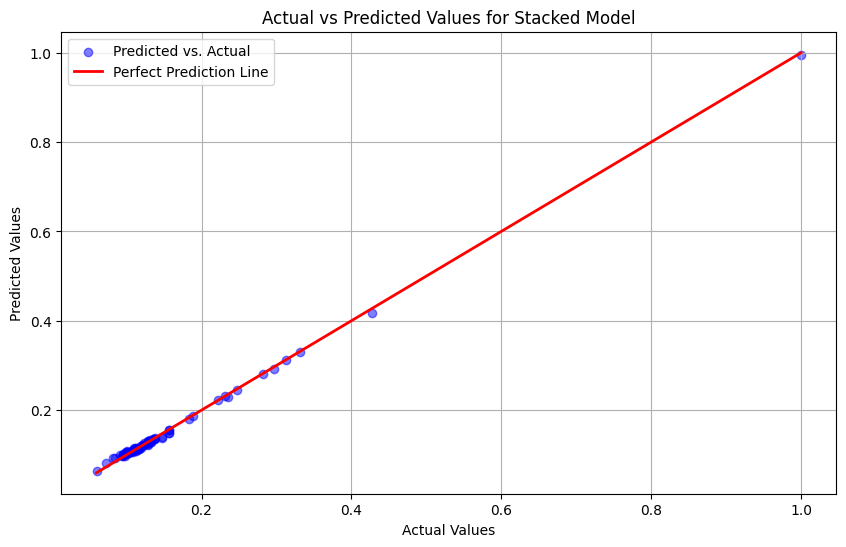

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv('new_data2.csv')
data = data.drop(columns=['date(dd/mm/yy)'])

# Create lag features for 'HYB'
def create_lag_features(data, column, n_lags=3):
    for lag in range(1, n_lags + 1):
        data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return data

data = create_lag_features(data, 'HYB', n_lags=3).dropna()
X = data.drop(columns=['HYB']).values
y = data['HYB'].values

# Scale data
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Custom function to train LSTM and BiLSTM
def build_and_train_rnn_model(model_type, X_train, y_train, X_test):
    model = Sequential()
    if model_type == "LSTM":
        model.add(LSTM(200, return_sequences=True, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
    elif model_type == "BiLSTM":
        model.add(Bidirectional(LSTM(200, return_sequences=True, activation='tanh'), input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.3))
    model.add(LSTM(100, activation='tanh'))
    model.add(Dropout(0.3))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=300, batch_size=16, validation_split=0.1, verbose=0)
    return scaler_y.inverse_transform(model.predict(X_test).flatten().reshape(-1, 1)).flatten()

# Get predictions from both models
predictions_lstm = build_and_train_rnn_model("LSTM", X_train_rnn, y_train, X_test_rnn)
predictions_bilstm = build_and_train_rnn_model("BiLSTM", X_train_rnn, y_train, X_test_rnn)

# Combine predictions for stacking with XGBoost as meta-model
stacked_predictions_train = np.column_stack([predictions_lstm, predictions_bilstm])
meta_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
meta_model.fit(stacked_predictions_train, y_test.flatten())

# Final stacked prediction
final_predictions = meta_model.predict(stacked_predictions_train)

# Evaluate
mse = mean_squared_error(y_test.flatten(), final_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test.flatten(), final_predictions)

print("Stacked Model Results (LSTM + BiLSTM with XGBoost Meta-Model):")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R²): {r2}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test.flatten(), final_predictions, alpha=0.5, color='blue', label='Predicted vs. Actual')
plt.plot([min(y_test.flatten()), max(y_test.flatten())], [min(y_test.flatten()), max(y_test.flatten())], color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Stacked Model')
plt.legend()
plt.grid(True)
plt.show()
